In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("Dataset/diabetic_data_training.csv")
df_test = pd.read_csv('Dataset/diabetic_data_test.csv')

display(df_train.shape, df_test.shape)

(91589, 50)

(10177, 50)

In [3]:
mapping_csv = pd.read_csv("Dataset/IDS_mapping.csv")
mapping_csv = mapping_csv.dropna(how='all')
dictionaries = {}
current_dict = 'admission_type_id'
dictionaries[current_dict] = {}


for index, row in mapping_csv.iterrows():
   id = row.to_list()[0]
   if id.isdigit():
       dictionaries[current_dict][row.to_list()[0]] = str(row.to_list()[1])
   else:
       current_dict = id
       dictionaries[current_dict] = {}

In [4]:
# Mapping the textual values associated with teh placeholder values given originally in teh dataset

# TRAIN DATA

if 'admission_type_id' in df_train.columns:
   df_train['admission_type_id'] = df_train['admission_type_id'].astype(str).map(dictionaries['admission_type_id'])


# Map discharge dispositions
if 'discharge_disposition_id' in df_train.columns:
   df_train['discharge_disposition_id'] = df_train['discharge_disposition_id'].astype(str).map(dictionaries['discharge_disposition_id'])


if 'admission_source_id' in df_train.columns:
   df_train['admission_source_id'] = df_train['admission_source_id'].astype(str).map(dictionaries['admission_source_id'])
   
# TEST DATA

if 'admission_type_id' in df_test.columns:
   df_test['admission_type_id'] = df_test['admission_type_id'].astype(str).map(dictionaries['admission_type_id'])


# Map discharge dispositions
if 'discharge_disposition_id' in df_test.columns:
   df_test['discharge_disposition_id'] = df_test['discharge_disposition_id'].astype(str).map(dictionaries['discharge_disposition_id'])


if 'admission_source_id' in df_test.columns:
   df_test['admission_source_id'] = df_test['admission_source_id'].astype(str).map(dictionaries['admission_source_id'])
   
display(df_train.head(10), df_test.head(10), df_train.shape, df_test.shape)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,Urgent,Discharged to home,Clinic Referral,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
5,55842,84259809,Caucasian,Male,[60-70),?,Elective,Discharged to home,Clinic Referral,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,63768,114882984,Caucasian,Male,[70-80),?,Emergency,Discharged to home,Emergency Room,5,...,No,No,No,No,No,No,No,No,Yes,>30
7,12522,48330783,Caucasian,Female,[80-90),?,Urgent,Discharged to home,Transfer from a hospital,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
8,15738,63555939,Caucasian,Female,[90-100),?,Elective,Discharged/transferred to SNF,Transfer from a hospital,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,36900,77391171,AfricanAmerican,Male,[60-70),?,Urgent,Discharged to home,Transfer from a hospital,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,nan,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,28236,89869032,AfricanAmerican,Female,[40-50),?,Emergency,Discharged to home,Emergency Room,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
2,150006,22864131,?,Female,[50-60),?,Urgent,Discharged to home,Transfer from a hospital,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
3,253380,56480238,AfricanAmerican,Female,[60-70),?,Emergency,Discharged to home,Emergency Room,6,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,383430,80588529,Caucasian,Female,[70-80),?,Emergency,Discharged/transferred to another short term h...,Emergency Room,1,...,No,Down,No,No,No,No,No,Ch,Yes,>30
5,550098,21820806,AfricanAmerican,Male,[50-60),?,Urgent,Discharged to home,Clinic Referral,4,...,No,No,No,No,No,No,No,No,No,<30
6,676422,63754317,AfricanAmerican,Female,[70-80),?,Emergency,Discharged to home,Emergency Room,4,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,870294,95075649,Caucasian,Female,[70-80),?,Emergency,Discharged/transferred to home with home healt...,Emergency Room,7,...,No,No,No,No,No,No,No,No,No,<30
8,1072554,114039603,Caucasian,Male,[70-80),?,Elective,Discharged to home,Clinic Referral,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,1161024,20830941,Caucasian,Female,[70-80),?,Emergency,Discharged/transferred to another short term h...,Emergency Room,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30


(91589, 50)

(10177, 50)

In [5]:
# CREATION OF df_train_ and df_test_ dataframes, which are simply dropping the columns below
features_to_drop = ['payer_code', 'medical_specialty', 'weight'] # remove 'encounter_id', 'patient_nbr' to keep temporal information

print("Number of columns in df_train_ before dropping:", len(df_train.columns))
print("Number of columns in df_test_ before dropping:", len(df_test.columns))
print("\n")

# # Drop columns directly from both dataframes
df_train_ = df_train.drop(columns=features_to_drop, axis=1)
df_test_ = df_test.drop(columns=features_to_drop, axis=1)

# Print the number of columns remaining
print("Number of columns in df_train_ after dropping:", len(df_train_.columns))
print("Number of columns in df_test_ after dropping:", len(df_test_.columns))


Number of columns in df_train_ before dropping: 50
Number of columns in df_test_ before dropping: 50


Number of columns in df_train_ after dropping: 47
Number of columns in df_test_ after dropping: 47


In [6]:
# Replace '?' with NaN
df_train_ = df_train_.replace('?', pd.NA)
df_test_ = df_test_.replace('?', pd.NA)

# Replace None or 'none' values in the specified columns with the desired text
df_train_['max_glu_serum'] = df_train_['max_glu_serum'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)
df_train_['A1Cresult'] = df_train_['A1Cresult'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)

# Replace None or 'none' values in the specified columns with the desired text
df_test_['max_glu_serum'] = df_test_['max_glu_serum'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)
df_test_['A1Cresult'] = df_test_['A1Cresult'].replace(
    [None, 'none'], "The test was not conducted on this patient"
)

print("Replacement completed for 'max_glu_serum' and 'A1Cresult'.")


Replacement completed for 'max_glu_serum' and 'A1Cresult'.


In [7]:
# Checking for Missing Values and Printing Only Features with Missing Values
missing_values_df_train_ = df_train_.isnull().sum()
# Filter for features with missing values
missing_values_df_train_ = missing_values_df_train_[missing_values_df_train_ > 0]

missing_values_df_test_ = df_test_.isnull().sum()
# Filter for features with missing values
missing_values_df_test_ = missing_values_df_test_[missing_values_df_test_ > 0]

# Print the features with missing values
print("\nFeatures with Missing Values in df_train_:")
print(missing_values_df_train_)

print("\nFeatures with Missing Values in df_test_:")
print(missing_values_df_test_)


Features with Missing Values in df_train_:
race      2059
diag_1      21
diag_2     320
diag_3    1266
dtype: int64

Features with Missing Values in df_test_:
race      214
diag_2     38
diag_3    157
dtype: int64


In [8]:
# are there any duplicates in patient numbers?
duplicates_pn = df_train_['patient_nbr'].duplicated().sum()
print(duplicates_pn)

# are there any dupliccates in encounter ids?
duplicates_eid = df_train_['encounter_id'].duplicated().sum()
print(duplicates_eid)
# print the number that correspond to the highest number of duplicates


25657
0


In [9]:
# convert age from categorical to numerical variable
age_mapping = {
       '[0-10)' : 5,
       '[10-20)' : 15,
       '[20-30)' : 25,
       '[30-40)' : 35,
       '[40-50)' : 45,
       '[50-60)' : 55,
       '[60-70)' : 65,
       '[70-80)' : 75,
       '[80-90)' : 85,
       '[90-100)' : 95,
}

df_train_['age'] = df_train_['age'].map(age_mapping)
df_test_['age'] = df_test_['age'].map(age_mapping)



The marignal improvement of our models after performing both KNN inputing and Semantic Inputing for strings was negligible. Hence, we decided to drop the 2% missing values in both train and test datasets. 

In [10]:
df_train_ = df_train_.dropna()
df_test_ = df_test_.dropna()
print(df_train_.shape, df_test_.shape)

(88243, 47) (9810, 47)


In [11]:
# Copy the original DataFrame
df_train_temp = df_train_.copy()

# Calculate the count of encounters for each patient
df_train_temp['number_previous_readmissions'] = df_train_temp.groupby('patient_nbr')['encounter_id'].transform('count')

# Drop encounter_id column
df_train_temp = df_train_temp.drop(columns=['encounter_id'])

# Identify binary columns
binary_columns = df_train_temp.select_dtypes(include=['int', 'bool']).nunique()[lambda x: x == 2].index.tolist()

# Identify categorical columns (excluding the 'readmitted' column)
categorical_columns = [col for col in df_train_temp.select_dtypes(include=['object', 'category']).columns if col != 'readmitted']

# Dummify categorical columns
df_train_temp = pd.get_dummies(df_train_temp, columns=categorical_columns, drop_first=True)

# Define the aggregation functions for each column
agg_funcs = {}
for col in df_train_temp.columns:
    if col not in ['patient_nbr', 'number_previous_readmissions', 'readmitted'] + binary_columns:
        agg_funcs[col] = 'mean'
    elif col in binary_columns or col == 'readmitted':
        agg_funcs[col] = lambda x: x.mode()[0]

# Save number_previous_readmissions to add back later
number_previous_readmissions_map = df_train_temp.groupby('patient_nbr')['number_previous_readmissions'].first().to_dict()

# Apply the aggregation functions
df_train_temp = df_train_temp.groupby('patient_nbr').agg(agg_funcs).reset_index()

# Add the number_previous_readmissions column back
df_train_temp['number_previous_readmissions'] = df_train_temp['patient_nbr'].map(number_previous_readmissions_map)

df_train_temp

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,number_previous_readmissions
0,135,55.0,8.0,77.0,6.0,33.0,0.0,0.0,0.0,8.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,378,55.0,2.0,49.0,1.0,11.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,729,85.0,4.0,68.0,2.0,23.0,0.0,0.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
3,774,85.0,3.0,46.0,0.0,20.0,0.0,0.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1152,60.0,9.0,41.0,2.5,16.5,0.0,0.0,2.0,5.5,...,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63275,189351095,85.0,1.0,73.0,1.0,11.0,0.0,0.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
63276,189365864,65.0,3.0,56.0,1.0,8.0,0.0,0.0,0.0,7.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
63277,189445127,85.0,3.0,39.0,0.0,18.0,0.0,0.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
63278,189481478,45.0,14.0,69.0,0.0,16.0,0.0,0.0,0.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [14]:
# Copy the original DataFrame
df_test_temp = df_test_.copy()

# Calculate the count of encounters for each patient
df_test_temp['number_previous_readmissions'] = df_test_temp.groupby('patient_nbr')['encounter_id'].transform('count')

# Drop encounter_id column
df_test_temp = df_test_temp.drop(columns=['encounter_id'])

# Identify binary columns
binary_columns = df_test_temp.select_dtypes(include=['int', 'bool']).nunique()[lambda x: x == 2].index.tolist()

# Identify categorical columns (excluding the 'readmitted' column)
categorical_columns = [col for col in df_test_temp.select_dtypes(include=['object', 'category']).columns if col != 'readmitted']

# Dummify categorical columns
df_test_temp = pd.get_dummies(df_test_temp, columns=categorical_columns, drop_first=True)

# Define the aggregation functions for each column
agg_funcs = {}
for col in df_test_temp.columns:
    if col not in ['patient_nbr', 'number_previous_readmissions', 'readmitted'] + binary_columns:
        agg_funcs[col] = 'mean'
    elif col in binary_columns or col == 'readmitted':
        agg_funcs[col] = lambda x: x.mode()[0] if not x.empty else np.nan

# Save number_previous_readmissions to add back later
number_previous_readmissions_map = df_test_temp.groupby('patient_nbr')['number_previous_readmissions'].first().to_dict()

# Apply the aggregation functions
df_test_temp = df_test_temp.groupby('patient_nbr').agg(agg_funcs).reset_index()

# Add the number_previous_readmissions column back
df_test_temp['number_previous_readmissions'] = df_test_temp['patient_nbr'].map(number_previous_readmissions_map)

# Output the final test DataFrame
df_test_temp

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Steady,glimepiride-pioglitazone_Steady,change_No,diabetesMed_Yes,number_previous_readmissions
0,135,55.0,3.0,31.0,1.0,14.0,0.0,0.0,1.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,927,35.0,5.0,49.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,1152,65.0,10.0,54.0,2.0,19.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
3,6696,85.0,1.0,36.0,0.0,8.0,0.0,0.0,0.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,10863,45.0,2.0,66.0,0.0,9.0,0.0,0.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261,187298114,85.0,2.0,21.0,0.0,11.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
9262,187820645,75.0,5.0,45.0,1.0,26.0,0.0,0.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
9263,188634893,75.0,4.0,52.0,0.0,11.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
9264,188970179,75.0,4.0,59.0,1.0,25.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [12]:
from scipy import stats

print(np.max(df_train_temp['number_previous_readmissions']))
print(stats.mode(df_train_temp['number_previous_readmissions']))

# Wow, some people have visited the hospital many times before. 

38
ModeResult(mode=1, count=48985)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Define a function to transform the DataFrame
def preprocess_data(df):
    df_temp = df.copy()

    # Ensure the readmitted column is the last column
    cols = list(df_temp.columns)
    cols.remove('readmitted')
    cols.append('readmitted')
    df_temp = df_temp[cols]

    # Convert the readmitted column to numeric values (0, 1, 2)
    label_encoder = LabelEncoder()
    df_temp['readmitted'] = label_encoder.fit_transform(df_temp['readmitted'])

    # Drop the patient_nbr column
    df_temp.drop(columns=['patient_nbr'], inplace=True)

    return df_temp

# Apply the function to both train and test datasets
df_train_ = preprocess_data(df_train_)
df_test_ = preprocess_data(df_test_)

print(df_train_.shape)
print(df_test_.shape)
display(df_train_, df_test_)

(88243, 46)
(9810, 46)


,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,Caucasian,Female,15,Emergency,Discharged to home,Emergency Room,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
1,64410,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency Room,2,11,5,...,No,No,No,No,No,No,No,No,Yes,2
2,500364,Caucasian,Male,35,Emergency,Discharged to home,Emergency Room,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,2
3,16680,Caucasian,Male,45,Emergency,Discharged to home,Emergency Room,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,2
4,35754,Caucasian,Male,55,Urgent,Discharged to home,Clinic Referral,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,443847548,AfricanAmerican,Male,75,Emergency,Discharged/transferred to SNF,Emergency Room,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
91585,443847782,AfricanAmerican,Female,85,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,2
91586,443854148,Caucasian,Male,75,Emergency,Discharged to home,Emergency Room,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,2
91587,443857166,Caucasian,Female,85,Urgent,Discharged/transferred to SNF,Emergency Room,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,2


,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,28236,AfricanAmerican,Female,45,Emergency,Discharged to home,Emergency Room,9,47,2,...,No,Steady,No,No,No,No,No,No,Yes,1
3,253380,AfricanAmerican,Female,65,Emergency,Discharged to home,Emergency Room,6,87,0,...,No,Steady,No,No,No,No,No,Ch,Yes,2
4,383430,Caucasian,Female,75,Emergency,Discharged/transferred to another short term h...,Emergency Room,1,28,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
5,550098,AfricanAmerican,Male,55,Urgent,Discharged to home,Clinic Referral,4,40,1,...,No,No,No,No,No,No,No,No,No,0
6,676422,AfricanAmerican,Female,75,Emergency,Discharged to home,Emergency Room,4,48,2,...,No,Steady,No,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10172,443266892,Caucasian,Male,55,Urgent,Discharged to home,Emergency Room,5,71,5,...,No,Down,No,No,No,No,No,Ch,Yes,1
10173,443721236,AfricanAmerican,Female,75,Emergency,Discharged to home,Emergency Room,3,57,4,...,No,No,No,No,No,No,No,No,No,2
10174,443778398,Caucasian,Male,45,Elective,Discharged to home,Physician Referral,1,1,5,...,No,Steady,No,No,No,No,No,Ch,Yes,2
10175,443824292,Caucasian,Female,85,Elective,Discharged to home,Physician Referral,3,31,2,...,No,Down,No,No,No,No,No,Ch,Yes,0


In [16]:
# Preserve the 'readmitted' column before one-hot encoding
readmitted_train = df_train_['readmitted']
readmitted_test = df_test_['readmitted']

# One-hot encoding of df_train_ and df_test_ (excluding 'readmitted')
df_train_ = pd.get_dummies(df_train_.drop(columns=['readmitted']), drop_first=True)
df_test_ = pd.get_dummies(df_test_.drop(columns=['readmitted']), drop_first=True)

# Align the columns of df_train_ and df_test_ to ensure consistency
df_train_, df_test_ = df_train_.align(df_test_, join='inner', axis=1)

# Convert boolean values to integers (True -> 1, False -> 0)
df_train_ = df_train_.astype(int)
df_test_ = df_test_.astype(int)

# Add the 'readmitted' column back to the dataframes
df_train_['readmitted'] = readmitted_train
df_test_['readmitted'] = readmitted_test

# Output the final shapes and display the processed dataframes
print(df_train_.shape, df_test_.shape)
display(df_train_, df_test_)

(88243, 1447) (9810, 1447)


,encounter_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,acarbose_Up,miglitol_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Steady,change_No,diabetesMed_Yes,readmitted
0,149190,15,3,59,0,18,0,0,0,9,...,0,0,0,0,0,1,0,0,1,1
1,64410,25,2,11,5,13,2,0,1,6,...,0,0,0,1,0,0,0,1,1,2
2,500364,35,2,44,1,16,0,0,0,7,...,0,0,0,0,0,1,0,0,1,2
3,16680,45,1,51,0,8,0,0,0,5,...,0,0,0,0,1,0,0,0,1,2
4,35754,55,3,31,6,16,0,0,0,9,...,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91584,443847548,75,3,51,0,16,0,0,0,9,...,0,0,0,0,0,0,0,0,1,1
91585,443847782,85,5,33,3,18,0,0,1,9,...,0,0,0,0,1,0,0,1,1,2
91586,443854148,75,1,53,0,9,1,0,0,13,...,0,0,0,0,0,0,0,0,1,2
91587,443857166,85,10,45,2,21,0,0,1,9,...,0,0,0,0,0,1,0,0,1,2


,encounter_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,acarbose_Up,miglitol_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Steady,change_No,diabetesMed_Yes,readmitted
1,28236,45,9,47,2,17,0,0,0,9,...,0,0,0,0,1,0,0,1,1,1
3,253380,65,6,87,0,18,0,0,0,9,...,0,0,0,0,1,0,0,0,1,2
4,383430,75,1,28,0,15,0,0,0,4,...,0,0,0,0,0,0,0,0,1,1
5,550098,55,4,40,1,14,0,0,0,9,...,0,0,0,1,0,0,0,1,0,0
6,676422,75,4,48,2,15,0,1,0,9,...,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10172,443266892,55,5,71,5,23,0,0,0,9,...,0,0,0,0,0,0,0,0,1,1
10173,443721236,75,3,57,4,11,0,0,1,9,...,0,0,0,1,0,0,0,1,0,2
10174,443778398,45,1,1,5,8,0,0,0,4,...,0,0,0,0,1,0,0,0,1,2
10175,443824292,85,3,31,2,24,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df_train_.drop(columns=['encounter_id'], inplace=True)
df_test_.drop(columns=['encounter_id'], inplace=True)

CHI-SQUARED FEATURE SELECTION: Now, we will prepare the data for our Chi-Squared feature selection. 

In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import pandas as pd

# Function to process train and test datasets
def preprocess_and_select_features(df_train, df_test, target_column, desired_contribution=0.99):
    # Step 1: Split Dataset into Features and Target
    y_train = df_train[target_column]
    X_train = df_train.drop(columns=[target_column])
    y_test = df_test[target_column]
    X_test = df_test.drop(columns=[target_column])

    # Align train and test columns
    X_train, X_test = X_train.align(X_test, join="inner", axis=1)

    # Ensure the target variable is numeric
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Retain column names for later use
    feature_columns = X_train.columns

    # Step 2: Scale Features using MinMaxScaler
    minmax_scaler = MinMaxScaler()
    X_train_scaled = minmax_scaler.fit_transform(X_train)
    X_test_scaled = minmax_scaler.transform(X_test)

    # Step 3: Apply Chi-Square Test
    print("Applying Chi-Square Test...")
    chi2_selector = SelectKBest(score_func=chi2, k='all')  # Use 'all' to get scores for all features
    chi2_selector.fit(X_train_scaled, y_train)

    # Chi-Square scores and cumulative explained contribution
    chi2_scores = pd.Series(chi2_selector.scores_, index=feature_columns).sort_values(ascending=False)
    cumulative_scores_chi2 = np.cumsum(chi2_scores) / chi2_scores.sum()

    # Step 4: Determine Optimal Number of Features
    optimal_k_chi2 = np.argmax(cumulative_scores_chi2 >= desired_contribution) + 1
    print(f"Optimal number of features to retain from Chi-Square: {optimal_k_chi2}")

    # Step 5: Select Top Features
    top_features_chi2 = chi2_scores.head(optimal_k_chi2).index.tolist()

    # Handle case when no features meet the threshold
    if len(top_features_chi2) == 0:
        print("No features selected based on Chi-Square test. Retaining all features.")
        top_features_chi2 = feature_columns.tolist()

    # Reduce datasets to Chi-Square selected features
    X_train_selected = pd.DataFrame(X_train_scaled, columns=feature_columns)[top_features_chi2]
    X_test_selected = pd.DataFrame(X_test_scaled, columns=feature_columns)[top_features_chi2]

    return X_train_selected, X_test_selected, y_train, y_test, top_features_chi2

# Apply the function to train and test datasets
X_train_selected, X_test_selected, y_train, y_test, selected_features = preprocess_and_select_features(
    df_train_, df_test_, target_column="readmitted"
)

# Output the selected features
print("Selected Features:", selected_features)
print("Train Data Shape:", X_train_selected.shape)
print("Test Data Shape:", X_test_selected.shape)

Applying Chi-Square Test...
Optimal number of features to retain from Chi-Square: 1114
Selected Features: ['discharge_disposition_id_Expired', 'number_inpatient', 'discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital .', 'diag_1_428', 'discharge_disposition_id_Discharged/transferred to home with home health service', 'admission_source_id_ Transfer from another health care facility', 'admission_source_id_Transfer from a hospital', 'diag_2_250', 'diag_2_403', 'diag_3_401', 'diag_3_250', 'discharge_disposition_id_Hospice / medical facility', 'diag_1_V58', 'admission_source_id_ Emergency Room', 'diag_2_401', 'discharge_disposition_id_Discharged to home', 'diag_3_585', 'diag_1_491', 'discharge_disposition_id_Hospice / home', 'discharge_disposition_id_Discharged/transferred to SNF', 'insulin_No', 'diag_2_648', 'diag_3_403', 'diag_1_250.6', 'insulin_Up', 'admission_type_id_nan', 'discharge_disposition_id_Discharged/transferred to another typ

Although PCA reduces our models' performance, you can decide to run the following cells to obtain with better explanability if you prioritize XAI in your research effort. 

In [27]:
# Step 6: PCA
print("Applying PCA...")
pca = PCA()
desired_contribution = 0.99

# Fit PCA on the training data and transform both train and test datasets
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)  # Use `transform` instead of `fit_transform` for the test set

# Calculate cumulative explained variance
explained_variance_pca = np.cumsum(pca.explained_variance_ratio_)

# Determine optimal number of PCA components
optimal_k_pca = np.argmax(explained_variance_pca >= desired_contribution) + 1
print(f"Optimal number of PCA components to retain: {optimal_k_pca}")

# Refit PCA with the optimal number of components
pca = PCA(n_components=optimal_k_pca)
X_train_pca_final = pca.fit_transform(X_train_selected)
X_test_pca_final = pca.transform(X_test_selected)

# Final dataset ready for training
print(f"X_train_pca_final shape: {X_train_pca_final.shape}")
print(f"X_test_pca_final shape: {X_test_pca_final.shape}")

Applying PCA...
Optimal number of PCA components to retain: 619
X_train_pca_final shape: (88243, 619)
X_test_pca_final shape: (9810, 619)


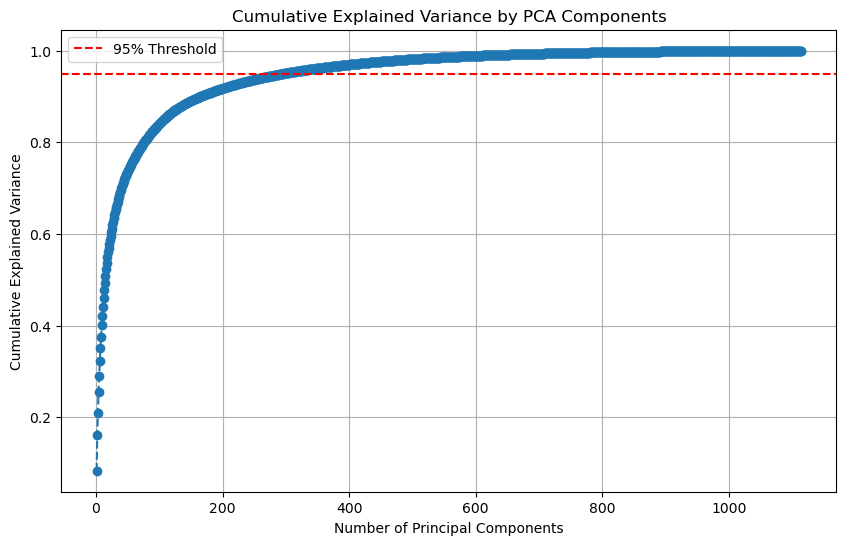

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_pca) + 1), explained_variance_pca, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid()
plt.show()

As you can see, our model's number of features decreased from 1114 features to 619, with a 95% threshold.

In [29]:
import pickle

# Save the data using pickle
with open("train_test_temp_data.pkl", "wb") as f:
    pickle.dump((X_train_pca_final, X_test_pca_final, y_train, y_test), f)